# Kuis Praktikum Komputasi Statistika II
---

Nama : Andriansah

NIM  : 23/519915/PA/22320

Kelas: A

> Baca dan pahami instruksi soal untuk setiap bagian dengan baik!

## Bagian I : **Algoritma K-Means Clustering**

### **1. Rumus & Formula**
K-Means adalah algoritma clustering yang digunakan untuk mengelompokkan data ke dalam $ K $ cluster berdasarkan kedekatan titik data dengan pusat cluster (centroid).

#### **1.1 Jarak Euclidean**
Untuk menentukan titik data ke centroid terdekat, kita menggunakan **jarak Euclidean**, yang didefinisikan sebagai:

$$
d(x, c) = \sqrt{\sum_{i=1}^{n} (x_i - c_i)^2}
$$

di mana:
- $ d(x, c) $ adalah jarak antara titik data $ x $ dan centroid $ c $.
- $ x_i $ dan $ c_i $ adalah koordinat dari titik data dan centroid pada dimensi ke-$ i $.
- $ n $ adalah jumlah dimensi fitur.

#### **1.2 Rata-rata Centroid Baru**
Setelah mengelompokkan titik data ke cluster masing-masing, kita memperbarui posisi centroid dengan rata-rata titik dalam cluster:

$$
c_j = \frac{1}{N_j} \sum_{i=1}^{N_j} x_i
$$

di mana:
- $ c_j $ adalah centroid baru untuk cluster $ j $.
- $ N_j $ adalah jumlah titik dalam cluster $ j $.
- $ x_i $ adalah titik dalam cluster $ j $.

---

#### **2. Langkah-langkah Algoritma K-Means**
1. **Inisialisasi**
   - Tentukan jumlah cluster **$ K $**.
   - Pilih $ K $ titik acak dari dataset sebagai **centroid awal**.

2. **Assignment Step (Menentukan Cluster)**
   - Untuk setiap titik data $ x_i $, hitung jarak ke setiap centroid $ c_j $ menggunakan **jarak Euclidean**.
   - Tetapkan titik data $ x_i $ ke cluster dengan **centroid terdekat**.

3. **Update Step (Menghitung Centroid Baru)**
   - Untuk setiap cluster, hitung **centroid baru** sebagai **rata-rata** dari semua titik data dalam cluster.

4. **Cek Konvergensi**
   - Jika centroid tidak berubah dari iterasi sebelumnya, maka **algoritma berhenti**.
   - Jika centroid masih berubah, ulangi langkah **Assignment Step** dan **Update Step**.

5. **Hasil Akhir**
   - Setiap titik data telah **berada di cluster tertentu**.
   - **Centroid final** adalah pusat dari masing-masing cluster.

---

### **3. Ilustrasi Perhitungan Manual**
Misalkan kita memiliki dataset berikut dengan 6 titik dalam ruang 2D:

| ID | $ x_1 $ | $ x_2 $ |
|----|----|----|
| 1  | 1  | 2  |
| 2  | 1  | 4  |
| 3  | 1  | 0  |
| 4  | 4  | 2  |
| 5  | 4  | 4  |
| 6  | 4  | 0  |

#### **3.1 Iterasi 1: Inisialisasi Centroid**
Misalkan kita memilih secara acak dua centroid awal:

$$
C_1 = (1, 2), \quad C_2 = (4, 4)
$$

#### **3.2 Iterasi 2: Assignment Step**
Hitung jarak Euclidean setiap titik ke kedua centroid:

| ID | $ (x_1, x_2) $ | $ d(x, C_1) $ | $ d(x, C_2) $ | Cluster |
|----|----|----|----|----|
| 1  | (1,2) | $ \sqrt{(1-1)^2 + (2-2)^2} = 0 $ | $ \sqrt{(1-4)^2 + (2-4)^2} = 3.61 $ | 1 |
| 2  | (1,4) | $ \sqrt{(1-1)^2 + (4-2)^2} = 2 $ | $ \sqrt{(1-4)^2 + (4-4)^2} = 3 $ | 1 |
| 3  | (1,0) | $ \sqrt{(1-1)^2 + (0-2)^2} = 2 $ | $ \sqrt{(1-4)^2 + (0-4)^2} = 5 $ | 1 |
| 4  | (4,2) | $ \sqrt{(4-1)^2 + (2-2)^2} = 3 $ | $ \sqrt{(4-4)^2 + (2-4)^2} = 2 $ | 2 |
| 5  | (4,4) | $ \sqrt{(4-1)^2 + (4-2)^2} = 3.61 $ | $ \sqrt{(4-4)^2 + (4-4)^2} = 0 $ | 2 |
| 6  | (4,0) | $ \sqrt{(4-1)^2 + (0-2)^2} = 3.61 $ | $ \sqrt{(4-4)^2 + (0-4)^2} = 4 $ | 1 |

#### **3.3 Iterasi 3: Update Centroid**
- **Cluster 1**: $ (1,2), (1,4), (1,0), (4,0) $
  $$
  C_1 = \left( \frac{1+1+1+4}{4}, \frac{2+4+0+0}{4} \right) = (1.75, 1.5)
  $$

- **Cluster 2**: $ (4,2), (4,4) $
  $$
  C_2 = \left( \frac{4+4}{2}, \frac{2+4}{2} \right) = (4, 3)
  $$

#### **3.4 Iterasi 4: Periksa Konvergensi**
- Jika centroid baru sama dengan yang sebelumnya, maka algoritma selesai.
- Jika masih berubah, ulangi **Assignment Step** dengan centroid baru.

### **4. Hasil**
Setelah beberapa iterasi, **centroid akan stabil**, dan setiap titik data akan memiliki **cluster finalnya**.

- **Cluster 1:** $ \{(1,2), (1,4), (1,0), (4,0)\} $
- **Cluster 2:** $ \{(4,2), (4,4)\} $

Hasilnya, titik-titik dalam dataset telah dikelompokkan dengan baik berdasarkan pola kedekatannya.

---
### **5. Catatan**
Anda ditugaskan untuk mengganti syntax di bawah ini
- Ganti ```PASS``` menjadi sebuah fungsi atau perintah yang lengkap
- Ganti ```pass``` menjadi sebuah variabel yang benar
- Kurangi penggunaan AI untuk menjawan soal di nomor ini
- Dilarang mengganti syntax yang sudah ada dengan struktur syntax lainnya


In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    """Menghitung Euclidean distance di antara dua titik."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(data, K, max_iterations=100):
    # Part 1: Inisialisasi Centroid
    np.random.seed(42)  # Untuk reproduktibilitas
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]  # Memilih Centroid secara acak

    for iteration in range(max_iterations):
        # Part 2: Assignment Step
        clusters = [[] for _ in range(K)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]  # Menghitung jarak ke semua centroid
            closest_centroid_index = np.argmin(distances)  # Mencari index centroid terdekat
            clusters[closest_centroid_index].append(point)  # Menambahkan point ke cluster

        # Part 3: Update Step
        new_centroids = []  # Inisialisasi list untuk menyimpan centroid baru
        for i, cluster in enumerate(clusters):
            if cluster:  # Jika cluster tidak kosong
                new_centroid = np.mean(cluster, axis=0)  # Hitung rata-rata
            else:  # Jika cluster kosong
                new_centroid = centroids[i]  # Gunakan centroid lama
            new_centroids.append(new_centroid)  # Tambahkan ke list
        new_centroids = np.array(new_centroids)  # Konversi ke numpy array

        # Part 4: Convergence Check
        if np.all(new_centroids == centroids):  # Jika centroid tidak berubah
            break

        # Part 5: Update Centroid
        centroids = new_centroids  # Update centroid

    return clusters, centroids

# Contoh penggunaan
if __name__ == "__main__":
    # Data sampel
    data = np.array([[1, 2], [1, 4], [1, 0],
                     [4, 2], [4, 4], [4, 0]])

    K = 2  # Jumlah cluster
    clusters, centroids = kmeans(data, K)

    print("Clusters:")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i}: {cluster}")
    print("Centroids:")
    print(centroids)

Clusters:
Cluster 0: [array([1, 2]), array([1, 0]), array([4, 2]), array([4, 0])]
Cluster 1: [array([1, 4]), array([4, 4])]
Centroids:
[[2.5 1. ]
 [2.5 4. ]]


## Bagian II

Anda merupakan seorang data analyst suatu perusahaan yang bergerak dalam industri hiburan digital dan memiliki platform yang menyajikan berbagai acara untuk penggunanya. Tahun ini, platform perusahaan Anda merilis sebuah acara baru yang awalnya mendapatkan respons yang baik namun kemudian mengalami penurunan jumlah permirsa. Sebagai seorang data analyst perusahaan tersebut, Anda diminta untuk memahami apa yang salah berdasarkan data. Untuk itu, dikumpulkan data perusahaan yang berkaitan dengan acara tersebut selama beberapa bulan terakhir untuk memahami faktor-faktor yang mempengaruhi jumlah pemirsa, sehingga perusahaan dapat mengambil tindakan yang diperlukan untuk meningkatkan jumlah pemirsa. Secara spesifik, data yang Anda miliki adalah sebagai berikut.
- `Views_show`: Jumlah tampilan acara
- `Visitors`: Jumlah pengunjung unik untuk acara tersebut
- `Views_platform`: Jumlah tampilan di platform untuk acara tersebut
- `Ad_impression`: Jumlah tayangan iklan untuk acara tersebut

Tujuan utama adalah untuk membangun model guna memprediksi `View_show` acara tersebut berdasarkan `Visitors`, `Views_platform`, dan `Ad_impression` menggunakan analisis regresi linear. Model ini diharapkan dapat membantu menentukan faktor-faktor mana yang paling mempengaruhi jumlah pemirsa, sehingga perusahaan dapat memperbaiki strategi promosi dan penargetan audiens.

In [ ]:
# Libary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [ ]:
# Import Data
df = pd.read_csv('c:\Lokal MSI\All About Coolyeah\Semester 4\Komputasi Statistika II\Praktikum Komstat II\Kuis 1 Prak Komstat II Kamis 27 Maret 11.10\mediacompany.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Andriansah\AppData\Local\Temp\ipykernel_16916\370501833.py:2: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv('c:\Lokal MSI\All About Coolyeah\Semester 4\Komputasi Statistika II\Praktikum Komstat II\Kuis 1 Prak Komstat II Kamis 27 Maret 11.10\mediacompany.csv')


,Views_show,Visitors,Views_platform,Ad_impression
0,183738,1260228,1706478,1060860448
1,193763,1270561,1690727,1031846645
2,210479,1248183,1726157,1010867575
3,240061,1492913,1855353,1079194579
4,446314,1594712,2041418,1357736987


#### <a id='toc1_1_2_2_'></a>[**Teknis Pengerjaan**](#toc0_)

Pada soal ini terdiri dari 2 kode soal dengan keterangan sebagai berikut.
- **AWC**: Anda harus menjawab soal yang diberikan menggunakan code beserta interpretasi dari output yang Anda peroleh.
- **AWOC**: Anda cukup menjelaskan menggunakan teori berdasarkan pertanyaan-pertanyaan yang diberikan tanpa harus melakukan eksekusi menggunakan code.

#### <a id='toc1_1_2_2_'></a>[**Tugas Anda**](#toc0_)

**[AWC]** Lakukan pemodelan regresi linear menggunakan variabel-variabel di atas, kemudian interpretasikan insight yang Anda dapatkan dari model yang diperoleh

*Notes: jika terdapat variabel yang tidak signifikan, pada studi kasus ini tetap dimasukkan dalam pemodelan*

In [ ]:
# Menentukan variabel indepenpeden dan dependen
X = df.drop(columns=['Views_show']) # variabel independen
Y = df['Views_show'] # variabel dependen

# Menambahkan konstanta (intersep) ke dalam model
X_const = sm.add_constant(X)

# Model regresi linear
model = sm.OLS(Y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     47.21
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.47e-17
Time:                        11:06:51   Log-Likelihood:                -1027.0
No. Observations:                  80   AIC:                             2062.
Df Residuals:                      76   BIC:                             2071.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.66e+05   8.13e+04     -5.

### **Interpretasi Model Regresi Linear**

Berdasarkan output di atas diperoleh model regresi linear untuk memprediksi `View_show` acara tersebut berdasarkan `Visitors`, `Views_platform`, dan `Ad_impression` yaitu sebagai berikut.

Views_show = -4.66×10^5 + 0.0937×Visitors + 0.0418×Views_platform + 0.0003×Ad_impression

- Nilai konstanta (intercept) model regresi sebesar -4.66×10^5 yang berarti bahwa jika semua variabel independen bernilai nol, maka Views_show akan bernilai negatif yaitu sebesar -4.66×10^5 karena ada faktor lain yang tidak dimasukkan dalam model regresi yang menyebabkan prediksi Views_show sangat rendah saat semua variabel independen nol dan karena View_show tidak mungkin bernilai negatif maka nilai konstanta dapat diasumsikan bernilai 0 ketika semua semua variabel independen bernilai nol.
- Nilai koefisien Visitors sebesar 0.0937 menunjukkan bahwa setiap bertambahnya satu satuan VisitorS akan meningkatkan Views_show sebesar 0.0937, namun karena memiliki p-value sebesar 0.483 > alpha = 0.05 yang berarti bahwa Visitors tidak memiliki dampak yang signifikan terhadap Views_show.
- Nilai koefisien Views_platform sebesar 0.0418 menunjukkan bahwa setiap bertambahnya satu satuan Views_platform akan meningkatkan Views_show sebesar 0.0418, namun karena memiliki p-value sebesar 0.716 > alpha = 0.05 yang berarti bahwa Views_platform tidak memiliki dampak yang signifikan terhadap Views_show.
- Nilai koefisien Ad_impression sebesar 0.0003 menunjukkan bahwa setiap bertambahnya satu satuan Ad_impression akan meningkatkan Views_show sebesar 0.0003, koefisien Ad_impression ini memiliki p-value sebesar 0.000 < alpha = 0.05 yang berarti bahwa Ad_impression memiliki dampak yang signifikan terhadap Views_show.
- Nilai R^2 sebesar 0.651 menunjukkan bahwa 65.1% variabilitas dalam variabel dependen dapat dijelaskan oleh model regresi dan sisanya 34.9% dijelaskan oleh faktor lainnnya.


Sebagai seseorang yang sudah mendalami analisis regresi sangat jauh, Anda sudah mempelajari dengan baik bahwa terdapat permasalahan-permasalahan yang mungkin terjadi pada suatu model regresi dan perlu dilakukan pengecekan serta penaganan untuk mendapatkan model yang baik.

#### <a id='toc1_1_2_2_'></a>[**Tugas Anda**](#toc0_)

**Problem 1: Non-Linearitas**
- **[AWC]** Visualisasikan hubungan antara variabel dependen dan masing-masing variabel independen. Apakah setiap variabel independen menunjukkan hubungan linear dengan variabel dependen?
- **[AWOC]** Jika ditemukan pola Non-Linearitas, apa langkah-langkah yang dapat anda aplikasikan sebagai bentuk penanganan?

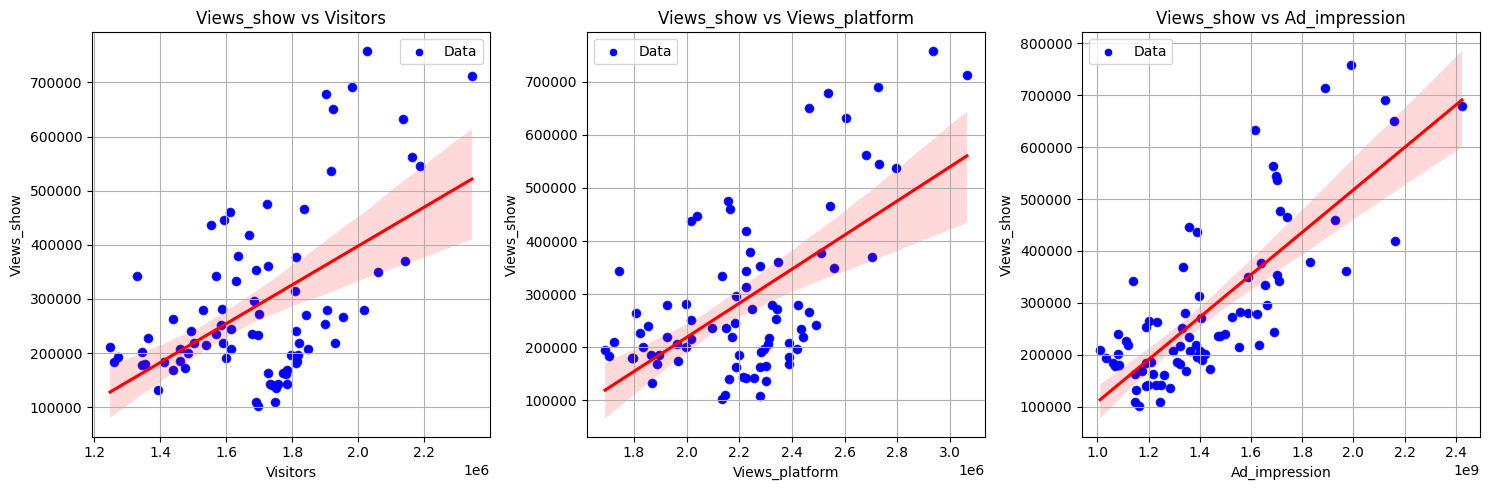

In [ ]:
# Visualisasi hubungan antara variabel dependen dan masing-masing variabel independen
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(5 * len(X.columns), 5))

for i, col in enumerate(X.columns):
    ax = axes[i] if len(X.columns) > 1 else axes  # Menangani kasus 1 kolom
    sns.scatterplot(x=X[col], y=Y, color="blue", label="Data", ax=ax)
    sns.regplot(x=X[col], y=Y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=ax) # garis regresi yang berwarna merah

    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Views_show")
    ax.set_title(f"Views_show vs {col}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### **Interpretasi Scatter Plot**
Berdasarkan output di atas diperoleh scatterplot variabel dependen yaitu Views_show dengan masing-masing variabel independen dapat dijelaskan hubungan antara Views_show dengan masing-masing variabel independen yaitu sebagai berikut.

### **Views_show vs Visitors**
Terlihat bahwa terdapat pola data yang tidak linear yang ditunjukkan bahwa masih terdapat penyebaran data yang besar, ada beberapa titik yang jauh dari garis regresi yang menunjukkan bahwa adanya variabilitas yang tinggi dalam Views_show yang tidak sepenuhnya dapat dijelaskan oleh Visitors sehingga dapat disimpulkan bahwa terdapat hubungan yang lemah antara Visitors dengan Views_show.

### **Views_show vs Views_platform**
Terlihat bahwa terdapat pola data yang tidak linear yang ditunjukkan bahwa masih terdapat penyebaran data yang cukup besar, ada beberapa titik yang jauh dari garis regresi yang menunjukkan bahwa adanya variabilitas yang tinggi dalam Views_show yang tidak sepenuhnya dapat dijelaskan oleh Views_platform sehingga dapat disimpulkan bahwa terdapat hubungan yang lemah antara Views_platform dengan Views_show.

### **Views_show vs Ad_impression**
Terlihat bahwa terdapat pola data yang cukup linear dibandingkan variabel independen lainnya, penyebaran data yang lebih baik di sekitar garis regresi menunjukkan bahwa terdapat hubungan yang kuat antara Ad_impression dengan Views_show.


## **Penanganan Pola Non-Linearitas dalam Analisis Regresi**

Jika ditemukan pola non-linearitas salah satu langkah yang dapat diterapkan adalah transformasi data pada variabel indenpenden yang menunjukkan pola non-linear terhadap variabel dependen yaitu Views_show dapat dijelaskan sebagai berikut.

### **Transformasi Data pada Variabel Independen**
Melakukan transformasi data pada variabel independen dapat membantu meningkatkan hubungan variabel independen dengan variabel dependen menjadi lebih linear. Adapun metode transformasi data yang dapat digunakan adalah sebagai berikut.

- **Transformasi Logaritmik**: Transformasi logaritma menggunakan logaritma natural ataupun logaritma dengan basis bilangan 2 atau 10 dapat mengurangi skala data yang besar atau memiliki pola eksponensial. Jika Visitors menunjukkan pola eksponensial terhadap Views_show, maka dapat menggunakan transformasi logaritmik misal dengan logaritma natural nilai Visitors nantinya akan menjadi ln(Visitors).

- **Transformasi Akar Kuadrat**: Transformasi dengan akar kuadrat ini dapat mengurangi heteroskedastisitas atau variabilitas yang meningkat pada variabel independen. Jika Views_platform memiliki variabilitas yang tinggi terhadap Views_show, maka dapat menggunakan transformasi akar kuadrat sehingga nilai Views_platform nantinya akan menjadi sqrt(Views_platform).

- **Transformasi Pangkat**: Transformasi pangkat digunakan untuk meningkatkan atau menurunkan derajat variabel independen agar hubungan dengan variabel dependen menjadi lebih linear. Jika Visitors menunjukkan pola hubungan yang lemah terhadap Views_show, maka dapat dilakukan transformasi pangkat, misalnya dengan kuadrat sehingga nilai Visitors nantinya akan menjadi Visitors^2.


Jenis transformasi data di atas dapat dipilih berdasarkan pola data yang terlihat pada scatter plot sehingga dapat meningkatkan hubungan antara variabel independen dengan variabel dependen menjadi lebih linear setelah dilakukan transformasi data.

**Problem 2: Autokorelasi**
- **[AWC]** Berdasarkan model yang Anda peroleh, lakukan pengecekan autokorelasi pada model Anda.
- **[AWC]** Jika ditemukan terdapat autokorelasi, lakukan penanganan menggunakan Generalized Least Squares.
- **[AWC]** Lakukan kembali pengecekan autokorelasi dari pemodelan GLS yang telah anda lakukan.
- **[AWC]** Bandingkan hasil pemodelan menggunakan OLS dan GLS serta tentukan model mana yang sebaiknya dipilih.

In [ ]:
# Uji Autokorelasi
dw = sm.stats.durbin_watson(model.resid)
print(f"Durbin-Watson statistic (OLS): {round(dw,3)}")
if dw < 1.5:
    print("Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa terdapat autokorelasi positif.")
elif dw > 2.5:
    print("Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa terdapat autokorelasi negatif.")
else:
    print("Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa tidak ada autokorelasi.")

Durbin-Watson statistic (OLS): 0.812
Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa terdapat autokorelasi positif.


### **Interpretasi**
Diperoleh nilai Durbin-Watson statistic sebesar 0.812 < 1.5 menunjukkan bahwa terdapat autokorelasi positif dalam residual model regresi linear yang bearti bahwa error pada satu observasi cenderung berhubungan dengan error pada observasi sebelumnya.

In [ ]:
from statsmodels.regression.linear_model import GLS

# Estimasi Autokorelasi
rho = np.corrcoef(model.resid[:-1], model.resid[1:])[0, 1]

# Matriks transformasi
T = len(model.resid)

# Matriks Autokorelasi
W = np.eye(T) - rho * np.eye(T, k=-1)

# Transformasi data
Y_gls = np.dot(W, Y)
X_gls = np.dot(W, X)

X_gls_df = pd.DataFrame(X_gls, columns=X.columns)
X_gls_df = sm.add_constant(X_gls_df)

gls_model = GLS(Y_gls, X_gls_df).fit()
print(gls_model.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            GLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     84.69
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           3.59e-24
Time:                        11:06:52   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.202e+05    3.7e+04     -8.

### **Interpretasi Model GLS**
Berdasarkan output di atas diperoleh model Generalized Least Square untuk memprediksi `View_show` acara tersebut berdasarkan `Visitors`, `Views_platform`, dan `Ad_impression` yaitu sebagai berikut.

Views_show = -3.202×10^5 + 0.1279×Visitors + 0.0811×Views_platform + 0.0005×Ad_impression

- Nilai konstanta (intercept) model regresi sebesar -3.202×10^5 yang berarti bahwa jika semua variabel independen bernilai nol, maka Views_show akan bernilai negatif yaitu sebesar -3.202×10^5 karena ada faktor lain yang tidak dimasukkan dalam model regresi yang menyebabkan prediksi Views_show sangat rendah saat semua variabel independen nol dan karena View_show tidak mungkin bernilai negatif maka nilai konstanta dapat diasumsikan bernilai 0 ketika semua semua variabel independen bernilai nol.
- Nilai koefisien Visitors sebesar 0.1279 menunjukkan bahwa setiap bertambahnya satu satuan VisitorS akan meningkatkan Views_show sebesar 0.1279, namun karena memiliki p-value sebesar 0.417 > alpha = 0.05 yang berarti bahwa Visitors tidak memiliki dampak yang signifikan terhadap Views_show.
- Nilai koefisien Views_platform sebesar 0.0811 menunjukkan bahwa setiap bertambahnya satu satuan Views_platform akan meningkatkan Views_show sebesar 0.0811, namun karena memiliki p-value sebesar 0.532 > alpha = 0.05 yang berarti bahwa Views_platform tidak memiliki dampak yang signifikan terhadap Views_show.
- Nilai koefisien Ad_impression sebesar 0.0005 menunjukkan bahwa setiap bertambahnya satu satuan Ad_impression akan meningkatkan Views_show sebesar 0.0005, koefisien Ad_impression ini memiliki p-value sebesar 0.000 < alpha = 0.05 yang berarti bahwa Ad_impression memiliki dampak yang signifikan terhadap Views_show.
- Nilai R^2 sebesar 0.770 menunjukkan bahwa 77% variabilitas dalam variabel dependen dapat dijelaskan oleh model regresi dan sisanya 23% dijelaskan oleh faktor lainnnya.


In [ ]:
# Uji Autokorelasi pada model GLS
dw_gls = sm.stats.durbin_watson(gls_model.resid)
print(f"Durbin-Watson statistic (GLS): {round(dw_gls, 3)}")
if dw_gls < 1.5:
    print("Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa terdapat autokorelasi positif.")
elif dw_gls > 2.5:
    print("Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa terdapat autokorelasi negatif.")
else:
    print("Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa tidak ada autokorelasi.")

Durbin-Watson statistic (GLS): 1.379
Berdasarkan hasil uji autokorelasi dapat disimpulkan bahwa terdapat autokorelasi positif.


### **Interpreatsi**
Diperoleh nilai Durbin-Watson statistic sebesar 1.379 < 1.5 menunjukkan bahwa masih terdapat autokorelasi positif dalam residual model GLS yang bearti bahwa error pada satu observasi cenderung berhubungan dengan error pada observasi sebelumnya.

In [ ]:
# Membandingkan metrik model OLS dan GLS
comparison = pd.DataFrame({
    "Metric": ["R-squared", "Adj. R-squared", "AIC", "BIC", "Durbin-Watson"],
    "OLS": [
        model.rsquared,
        model.rsquared_adj,
        model.aic,
        model.bic,
        dw
    ],
    "GLS": [
        gls_model.rsquared,
        gls_model.rsquared_adj,
        gls_model.aic,
        gls_model.bic,
        dw_gls
    ]
})
print(comparison)

           Metric          OLS          GLS
0       R-squared     0.650798     0.769751
1  Adj. R-squared     0.637014     0.760663
2             AIC  2061.966194  2016.315560
3             BIC  2071.494301  2025.843667
4   Durbin-Watson     0.812273     1.378511


### **Perbandingan Model Regresi Linear dengan GLS**
Berdasarkana output di atas perbandingkan antara model OLS dan GLS dapat diperoleh kesimpulan sebagai berikut.
- Nilai R-squared model GLS sebesar 76.98% dapat menjelaskan variabilitas variabel dependen yaitu Views_show lebih tinggi dibanding model OLS yang hanya 65.08%. Hal ini menunjukkan bahwa model GLS lebih baik dalam menjelaskan variabel dependen dibandingkan model OLS.
- Model GLS memiliki nilai adjusted R² yang lebih tinggi dibandingkan model OLS yang berarti bahwa model GLS lebih mampu menjelaskan variabilitas dibandingkan model OLS dalam variabel dependen yaitu Views_show setelah mempertimbangkan jumlah variabel independen dalam model.
- Nilai AIC model GLS sebesar 2016.315560 < model OLS sebesar 2061.966194 yang menunjukkan bahwa model GLS lebih optimal dengan keseimbangan antara akurasi dan kompleksitas.
- Nilai BIC model GLS ebesar 2025.843667 < model OLS sebesar 2071.494301 yang menunjukkan bahwa bahwa model GLS ini lebih baik dibandingkan model OLS dalam hal keseimbangan antara goodness-of-fit dan jumlah parameter.
- Nilai DW model GLS sebesar 1.378511 > model OLS sebesar 0.812273 yang berarti bahwa model GLS dapat meningkatkan DW menjadi mendekati 1.5 yang berarti mengurangi autokorelasi dalam residual.

Oleh karena itu, dapat disimpulkan bahwa model yang sebaiknya dipilih adalah model GLS.

**Problem 3: Heteroskedastisitas**
- **[AWOC]** Jika heteroskedastisitas terdeteksi pada model Anda, jelaskan dampaknya terhadap hasil uji hipotesis dan interval kepercayaan.
- **[AWC]** Berdasarkan model yang Anda peroleh, lakukan pengecekan apakah terdapat heteroskedastisitas?

Heteroskedastisitas terjadi ketika varians dari residual tidak konstan di seluruh rentang nilai variabel independen. Dampaknya terhadap hasil uji hipotesis dan interval kepercayaan dapat dijelaskan sebagai berikut.
1. **Hasil Uji Hipotesis**
	- Heteroskedastisitas dapat menyebabkan estimasi standar error menjadi tidak akurat. Akibatnya, nilai t-statistik dan p-value yang digunakan untuk menguji signifikansi koefisien regresi menjadi tidak valid.
	- Hal ini dapat menyebabkan kesimpulan yang salah, seperti menerima hipotesis nol (tidak ada hubungan) ketika sebenarnya ada hubungan (type II error) atau menolak hipotesis nol ketika sebenarnya tidak ada hubungan (type I error).

2. **Interval Kepercayaan**
	- Interval kepercayaan untuk koefisien regresi menjadi tidak dapat diandalkan karena standar error yang salah. Interval kepercayaan dapat menjadi terlalu sempit atau terlalu lebar, sehingga tidak mencerminkan ketidakpastian sebenarnya dalam estimasi parameter.

Secara keseluruhan, heteroskedastisitas dapat mengurangi validitas inferensi statistik dari model regresi. Oleh karena itu, penting untuk mendeteksi dan menangani heteroskedastisitas agar hasil analisis lebih akurat.

   LM Statistic   p-value  F-Statistic  F p-value
0       2.19378  0.533175     0.714284   0.546471


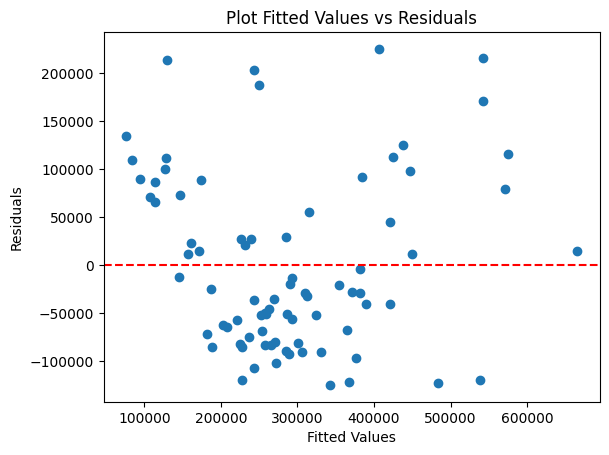

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Uji Heteroskedastisitas dengan Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'p-value', 'F-Statistic', 'F p-value']
bp_test_df = pd.DataFrame([bp_test], columns=labels)
print(bp_test_df)

# Fitted Values vs Residuals Plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Plot Fitted Values vs Residuals")
plt.show()

### **Interpretasi**
Berdasarkan hasil uji heteroskedastisitias dengan Breusch-Pagan diperoleh p-value sebesar 0.533175 > alpha = 0.05, maka H0 tidak ditolak. Oleh karena itu, dapat disimpulkan bahwa tidak terdapat heteroskedastisitas pada model regresi sehingga varians residual dapat dianggap konstan.

Berdasarkan Plot Fitted Values vs Residuals dapat dikatakan heterokedastisitas pada suatu model apabila titik residual pada plot membentuk pola tertentu. Pada plot di atas, terlihat bahwa titik residual menyebar secara acak atau tidak membentuk pola tertentu. Oleh karena itu, dapat disimpulkan secara eksploratif bahwa tidak terdapat heterokedastisitas pada model regresi.

**Problem 4: Multikolinearitas**
- **[AWC]** Lakukan pengecekan multikolinearitas, kemudian jelaskan hasil pengecekan yang Anda peroleh?
- **[AWOC]** Jika pada suatu model terdeteksi terdapat multikolinearitas, langkah penanganan apa saja yang dapat Anda lakukan?
- **[AWC]** Lakukan salah satu dari penanganan yang Anda jelaskan pada bagian sebelumnya jika Anda mendeteksi adanya multikolineritas pada data Anda.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menghitung VIF untuk setiap variabel independen
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         Variabel         VIF
0        Visitors  473.566905
1  Views_platform  577.914816
2   Ad_impression    1.710848


### **Interpretasi**
Variabel independen dapat dikatakan mengalami multikolinearitas jika nilai VIF > 10. Berdasarkan output di atas diperoleh hasil bahwa Visitors dan Views_platform memiliki nilai VIF > 10 yang berarti bahwa terdapat multikolinearitas yang sangat tinggi pada variabel Visitors dan Views_platform. Sedangkan variabel Ad_impression memiliki nilai VIF sebesar 1.710848 < 10 yang berarti bahwa tidak terdapat multikolinearitas pada variabel Ad_impression.

### **Jika pada suatu model terdeteksi multikolinearitas dapat dilakukan penanganan yaitu sebagai berikut.**

1. **Menghapus Variabel Independen yang Berkorelasi Tinggi**
    - Identifikasi variabel independen yang memiliki korelasi tinggi dengan variabel lain menggunakan matriks korelasi atau nilai Variance Inflation Factor (VIF).
    - Hapus salah satu variabel yang berkorelasi tinggi untuk mengurangi multikolinearitas.

2. **Menggabungkan Variabel yang Berkorelasi Tinggi**
    - Jika dua atau lebih variabel memiliki korelasi tinggi, pertimbangkan untuk menggabungkannya menjadi satu variabel baru, misalnya dengan menggunakan metode Principal Component Analysis (PCA).

3. **Transformasi Variabel**
    - Lakukan transformasi pada variabel independen, seperti logaritma, akar kuadrat, atau standar normalisasi, untuk mengurangi korelasi antar variabel.

4. **Regularisasi**
    - Gunakan metode regresi dengan regularisasi seperti Ridge Regression atau Lasso Regression. Metode ini menambahkan penalti pada koefisien regresi untuk mengurangi dampak multikolinearitas.

5. **Meningkatkan Ukuran Sampel**
    - Jika memungkinkan, tambahkan lebih banyak data ke dalam model. Dengan ukuran sampel yang lebih besar, efek multikolinearitas dapat berkurang.

6. **Menggunakan Model Alternatif**
    - Gunakan metode analisis alternatif seperti Partial Least Squares (PLS) Regression yang dirancang untuk menangani multikolinearitas.

### **Jika pada suatu model terdeteksi multikolinearitas dapat dilakukan penanganan yaitu sebagai berikut.**

1. **Menghapus Variabel Independen yang Berkorelasi Tinggi**
    - Identifikasi variabel independen yang memiliki korelasi tinggi dengan variabel lain menggunakan matriks korelasi atau nilai Variance Inflation Factor (VIF).
    - Hapus salah satu variabel yang berkorelasi tinggi untuk mengurangi multikolinearitas.

2. **Menggabungkan Variabel yang Berkorelasi Tinggi**
    - Jika dua atau lebih variabel memiliki korelasi tinggi, pertimbangkan untuk menggabungkannya menjadi satu variabel baru, misalnya dengan menggunakan metode Principal Component Analysis (PCA).

3. **Penanganan dengan PCA**
    
    Principal Component Analysis (PCA) dapat digunakan untuk mengurangi dimensi data dengan menggabungkan variabel yang berkorelasi tinggi menjadi komponen utama dengan cara sebagai berikut.
    - Standarisasi data untuk memastikan semua variabel memiliki skala yang sama.
    - Terapkan PCA untuk mengidentifikasi komponen utama yang menjelaskan sebagian besar variabilitas dalam data.
    - Pilih sejumlah komponen utama yang cukup untuk menjelaskan variabilitas yang signifikan.
    - Gunakan komponen utama tersebut sebagai variabel independen dalam model regresi.

4. **Transformasi Data**
    - Melakukan transformasi data pada variabel independen, seperti logaritma, akar kuadrat, atau standar normalisasi, untuk mengurangi korelasi antar variabel.

5. **Regularisasi**
    - Gunakan metode regresi dengan regularisasi seperti Ridge Regression atau Lasso Regression. Metode ini menambahkan penalti pada koefisien regresi untuk mengurangi dampak multikolinearitas.

6. **Meningkatkan Ukuran Sampel**
    - Jika memungkinkan, tambahkan lebih banyak data ke dalam model. Dengan ukuran sampel yang lebih besar, efek multikolinearitas dapat berkurang.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (Principal Component Analysis)
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# Menampilkan varians yang dijelaskan oleh setiap komponen utama
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1

X_pca_selected = X_pca[:, :n_components]

# Model regresi dengan komponen utama (PCR)
X_pca_const = sm.add_constant(X_pca_selected)
pcr_model = sm.OLS(Y, X_pca_const).fit()

print(pcr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     71.52
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.78e-18
Time:                        11:06:53   Log-Likelihood:                -1027.1
No. Observations:                  80   AIC:                             2060.
Df Residuals:                      77   BIC:                             2067.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.899e+05   1.04e+04     27.933      0.0

In [ ]:
# Menghitung VIF untuk komponen utama yang dipilih
vif_pcr = pd.DataFrame()
vif_pcr["Component"] = [f"PC{i+1}" for i in range(X_pca_selected.shape[1])]
vif_pcr["VIF"] = [variance_inflation_factor(X_pca_selected, i) for i in range(X_pca_selected.shape[1])]

print(vif_pcr)

  Component  VIF
0       PC1  1.0
1       PC2  1.0


### **Interpretasi Model PCR**

#### **Koefisien Model**
    - Intercept (const): Nilai konstanta sebesar 2.899×10^5 menunjukkan bahwa jika semua komponen utama bernilai nol maka nilai prediksi `Views_show` adalah 2.899×10^5.
    - PC1 (x1): Koefisien sebesar 7.104×10^4 menunjukkan bahwa setiap peningkatan satu unit pada komponen utama pertama (PC1) akan meningkatkan `Views_show` sebesar 7.104×10^4 dengan asumsi komponen lainnya tetap.
    - PC2 (x2): Koefisien sebesar 7.728×10^4 menunjukkan bahwa setiap peningkatan satu unit pada komponen utama kedua (PC2) akan meningkatkan `Views_show` sebesar 7.728×10^4 dengan asumsi komponen lainnya tetap.

#### **Signifikansi Koefisien**
    - Nilai konstanta dan semua koefisien memiliki p-value < 0.05 yang berarti bahwa nilai konstanta dan komponen utama (PC1 dan PC2) secara signifikan memengaruhi `Views_show`.

#### **Kesimpulan**

    - Model PCR menunjukkan bahwa kedua komponen utama (PC1 dan PC2) memiliki pengaruh signifikan terhadap `Views_show`.
    - Koefisien positif pada PC1 dan PC2 menunjukkan bahwa peningkatan pada komponen utama ini akan meningkatkan jumlah `Views_show`.


### **Interpretasi Nilai VIF untuk Komponen Utama**
Berdasarkan output di atas diperoleh nilai Variance Inflation Factor (VIF) untuk komponen utama (Principal Components) sebagai berikut.
- PC1 memiliki nilai VIF sebesar 1.0.
- PC2 memiliki nilai VIF sebesar 1.0.

Nilai VIF sebesar 1.0 menunjukkan bahwa tidak ada multikolinearitas di antara komponen utama yang digunakan dalam model. Hal ini sesuai dengan tujuan Principal Component Analysis (PCA) yaitu menghilangkan korelasi antar variabel dengan mengubahnya menjadi komponen utama yang orthogonal (tidak saling berkorelasi). Oleh karena itu, dapat disimpulkan bahwa model regresi yang menggunakan komponen utama ini tidak mengalami masalah multikolinearitas, sehingga hasil estimasi parameter regresi lebih stabil.

## Bagian III

Di era digitalisasi pendidikan saat ini, pemahaman mendalam mengenai pola pembelajaran pengguna menjadi sangat penting. Data yang dihasilkan dari interaksi pengguna terhadap platform pembelajaran online dapat dimanfaatkan untuk memahami profil belajar pengguna secara lebih mendalam. Dataset yang disediakan mencakup informasi mengenai durasi belajar, jumlah kursus yang diikuti baik pada tingkat pemula maupun lanjutan, serta skor rata-rata yang diperoleh pengguna pada berbagai bidang pembelajaran (Data Science, Backend, dan Frontend).

Dataset ini memiliki target klasifikasi berupa profil pengguna (`PROFILE`) berdasarkan preferensi atau kemampuan mereka dalam bidang tertentu. Dalam konteks ini, tujuan utama adalah memahami karakteristik pengguna berdasarkan data historis mereka, sehingga nantinya dapat dikembangkan strategi personalisasi pendidikan yang lebih efektif.

## Tugas yang Harus Dilakukan

### 1. Exploratory Data Analysis (EDA)
- Lakukan eksplorasi awal untuk memahami karakteristik dan distribusi data.
- Identifikasi pola atau insight awal yang relevan.

### 2. Preprocessing Data
- Identifikasi dan tangani missing values (pengisian menggunakan metode yang tepat, misalnya mean, median, atau mode).
- Lakukan encoding untuk variabel kategori (jika diperlukan).
- Lakukan standarisasi atau normalisasi data jika diperlukan.

### 3. Modeling
Bangun model klasifikasi menggunakan metode berikut:
- Linear Discriminant Analysis (**LDA**)
- Quadratic Discriminant Analysis (**QDA**)
- K-Nearest Neighbors (**KNN**)
- **Naive Bayes**

### 4. Evaluasi Model
Gunakan Metrik evaluasi yang sesuai dengan performa model. Berikan alasan pemilihannya. Serta manakah model terbaik dari hasil analisis yang telah dilakukan?



In [ ]:
# Import Data
df = pd.read_csv('c:\Lokal MSI\All About Coolyeah\Semester 4\Komputasi Statistika II\Praktikum Komstat II\Kuis 1 Prak Komstat II Kamis 27 Maret 11.10\dataset-no-3.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Andriansah\AppData\Local\Temp\ipykernel_16916\497970527.py:2: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv('c:\Lokal MSI\All About Coolyeah\Semester 4\Komputasi Statistika II\Praktikum Komstat II\Kuis 1 Prak Komstat II Kamis 27 Maret 11.10\dataset-no-3.csv')


,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


In [ ]:
# Library
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Exploratory Data Analysis (EDA)**

### **Pie Chart Profil Pengguna**

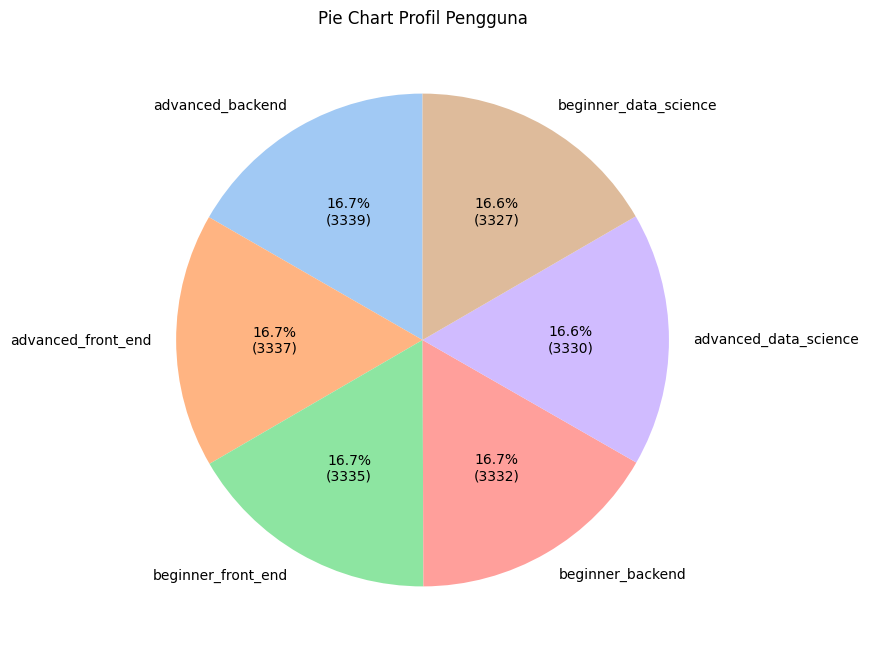

In [ ]:
# Menghitung jumlah pengguna berdasarkan profil
profile_counts = df['PROFILE'].value_counts()

# Membuat pie chart dengan frekuensi dan persentase
plt.figure(figsize=(8, 8))
profile_counts.plot.pie(
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(profile_counts) / 100)})',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Pie Chart Profil Pengguna')
plt.ylabel('')
plt.show()

### **Interpretasi**
Diperoleh output di atas pie chart profil masing-masing pengguna kursus memiliki proporsi yang tidak jauh berbeda. Profil pengguna pada kursus yang paling banyak adalah Advanced Backend sedangkan profil pengguna paling sedikit adalah Advanced Data Science.

### **Distribusi Jam Belajar yang Dihabiskan oleh Pengguna untuk Belajar atau Mengikuti Kursus Setiap Bidang**


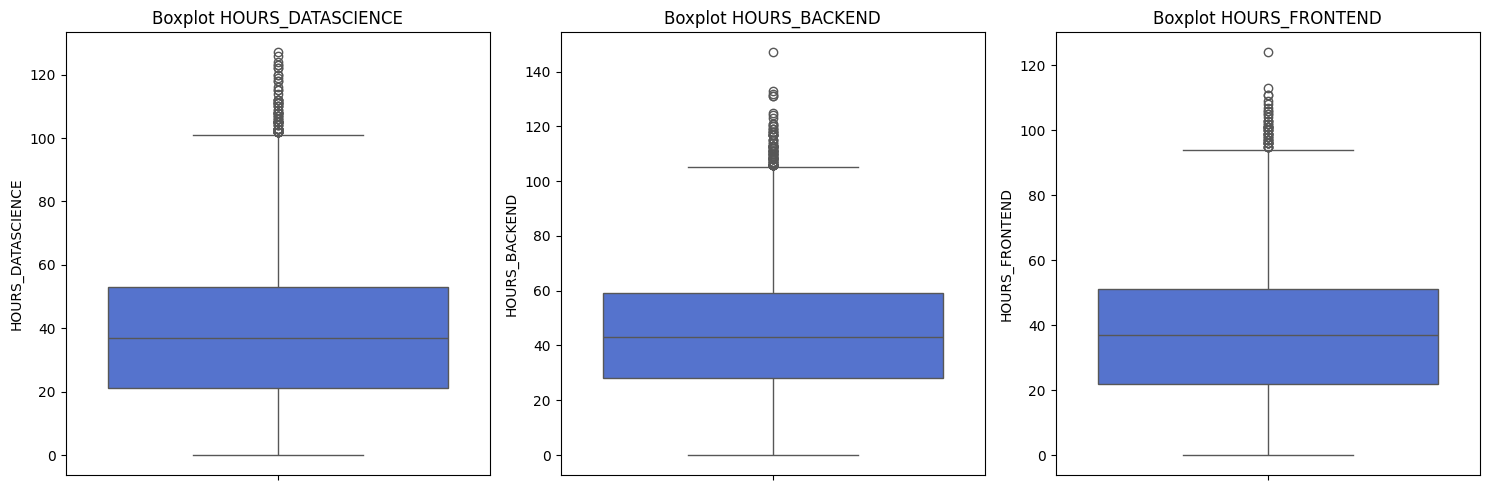

In [ ]:
# Visualisasi dengan Boxplot untuk variabel numerik
numerical_columns = ['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[col], color='royalblue')
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### **Interpretasi**
Diperoleh output di atas boxplot jam yang dihabiskan oleh pengguna untuk belajar atau mengikuti kursus setiap bidang yaitu Data Science, Backend, dan Frontend secara keseluruhan memiliki banyak outlier jam belajar di atas 100 jam sehingga dapat disimpulkan bahwa jam yang dihabiskan oleh pengguna untuk belajar atau mengikuti kursus setiap bidang yaitu Data Science, Backend, dan Frontend tidak berdistribusi normal.

### **Distribusi Skor Rata-rata yang Diperoleh Pengguna dalam Kursus Setiap Bidang**

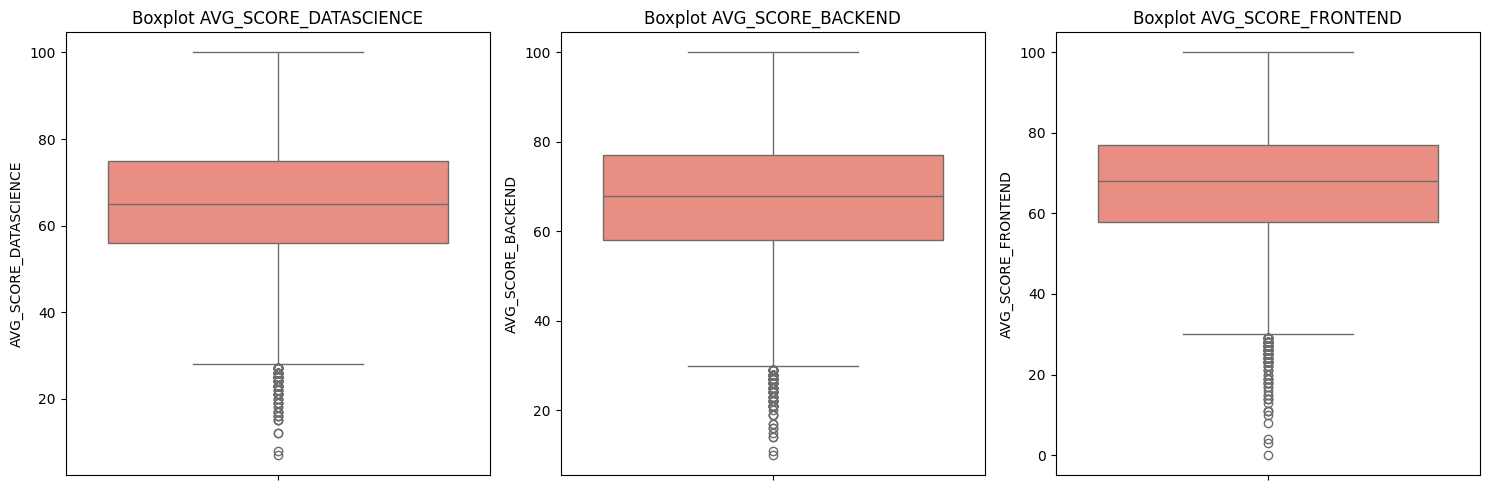

In [ ]:
# Kolom average score untuk setiap bidang
average_score_columns = ['AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND']

# Membuat boxplot untuk setiap bidang
plt.figure(figsize=(15, 5))
for i, col in enumerate(average_score_columns, 1):
    plt.subplot(1, len(average_score_columns), i)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### **Interpretasi**
Diperoleh output di atas boxplot skor rata-rata yang diperoleh pengguna dalam kursus untuk setiap bidang yaitu Data Science, Backend, dan Frontend secara keseluruhan memiliki banyak outlier skor rata-rata di bawah 30 sehingga dapat disimpulkan bahwa skor rata-rata yang diperoleh pengguna dalam kursus untuk setiap bidang yaitu Data Science, Backend, dan Frontend tidak berdistribusi normal.

#### **Distribusi Jumlah Kursus yang Diikuti oleh Pengguna Setiap Bidang**

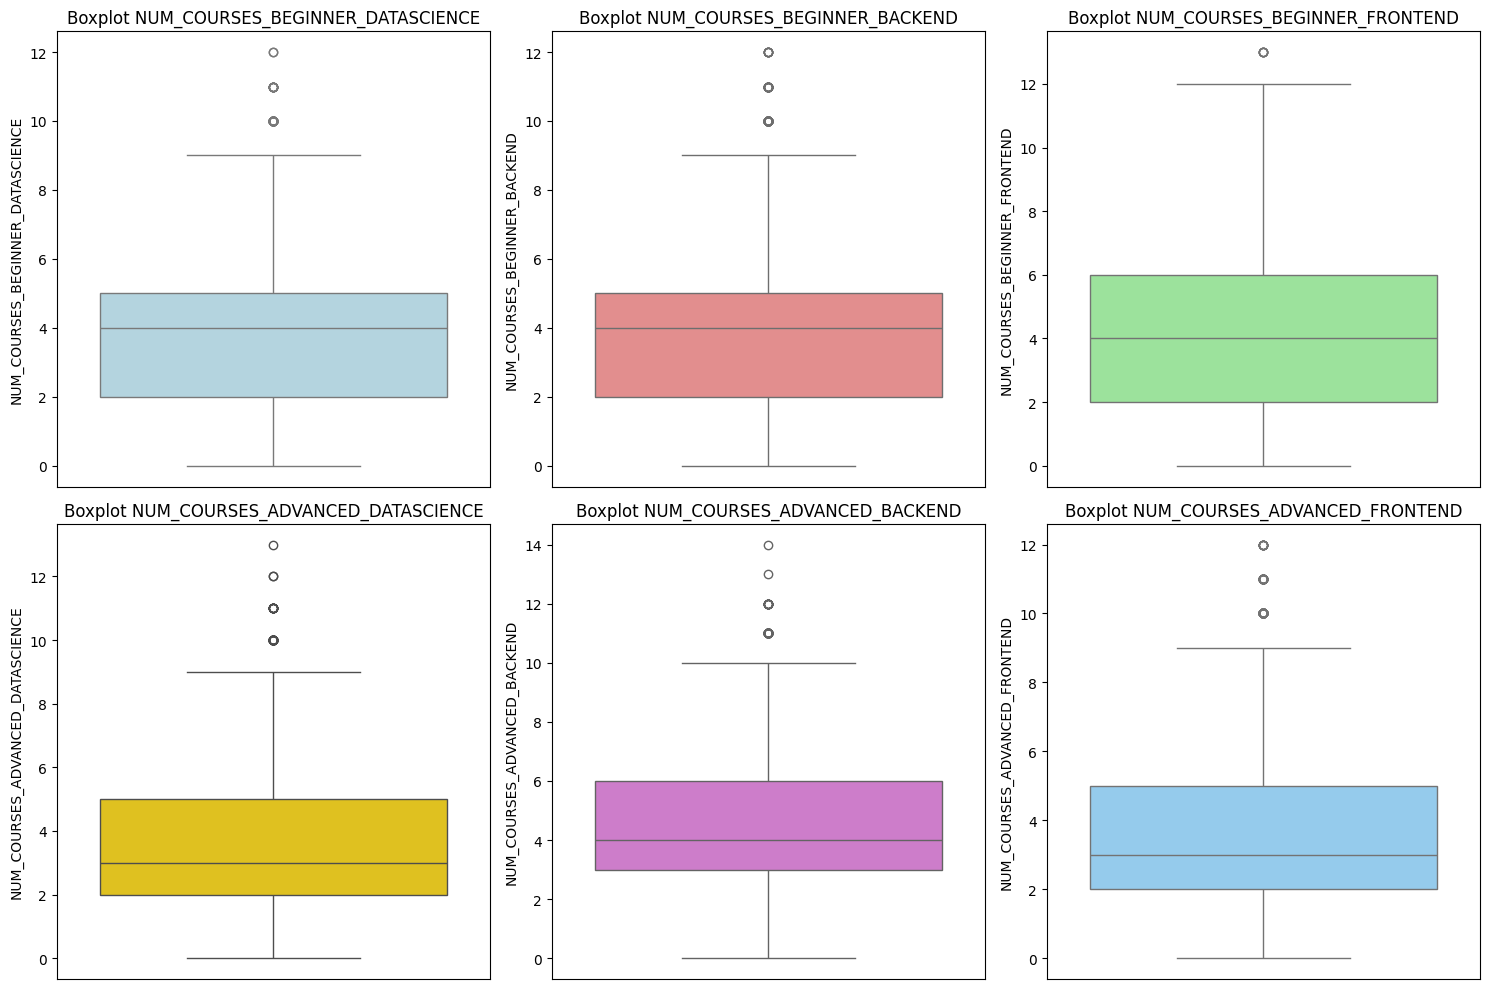

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom jumlah kursus untuk setiap bidang
course_columns = [
    'NUM_COURSES_BEGINNER_DATASCIENCE',
    'NUM_COURSES_BEGINNER_BACKEND',
    'NUM_COURSES_BEGINNER_FRONTEND',
    'NUM_COURSES_ADVANCED_DATASCIENCE',
    'NUM_COURSES_ADVANCED_BACKEND',
    'NUM_COURSES_ADVANCED_FRONTEND'
]

# Daftar warna berbeda untuk setiap boxplot
colors = ['lightblue', 'lightcoral', 'lightgreen', 'gold', 'orchid', 'lightskyblue']

# Membuat boxplot untuk setiap bidang
plt.figure(figsize=(15, 10))

for i, (col, color) in enumerate(zip(course_columns, colors), 1):
    plt.subplot(2, 3, i)  # Grid 2 baris, 3 kolom
    sns.boxplot(y=df[col], color=color)
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

### **Interpretasi**
Diperoleh output di atas boxplot jumlah kursus yang diikuti oleh pengguna setiap bidang terlihat bahwa pengguna di bidang Beginner Data Science, Beginner Backend, Advance Data Science, dan Advance Frontend memiliki outlier jumlah kursus lebih dari atau sama dengan 10 kursus. Pengguna di bidang Beginner Frontend memiliki 1 oulier jumlah kursus sebanyak 13 kursus. Sedangkan, pengguna di bidang Advanced Backend memiliki outlier jumlah kursus lebih dari atau sama dengan 11 kursus. Oleh karena itu, dapat disimpulkan bahwa secara keseluruhan jumlah kursus yang diikuti oleh pengguna setiap bidang tidak berdistribusi normal.

## **2. Preprocessing Data**

### **Mengecek dan Menangani Missing Value**

In [ ]:
import pandas as pd

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))

                                  Missing Values  Percentage
AVG_SCORE_DATASCIENCE                        220       1.100
AVG_SCORE_FRONTEND                           168       0.840
AVG_SCORE_BACKEND                             84       0.420
HOURS_BACKEND                                 53       0.265
NUM_COURSES_BEGINNER_FRONTEND                 39       0.195
NUM_COURSES_ADVANCED_FRONTEND                 37       0.185
NUM_COURSES_BEGINNER_DATASCIENCE              26       0.130
NUM_COURSES_BEGINNER_BACKEND                  18       0.090
HOURS_FRONTEND                                16       0.080
HOURS_DATASCIENCE                             14       0.070
NUM_COURSES_ADVANCED_BACKEND                   8       0.040
NUM_COURSES_ADVANCED_DATASCIENCE               2       0.010
NAME                                           0       0.000
Unnamed: 0                                     0       0.000
USER_ID                                        0       0.000
PROFILE                 

In [ ]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
df.isnull().sum()

Unnamed: 0                            0
NAME                                  0
USER_ID                               0
HOURS_DATASCIENCE                     0
HOURS_BACKEND                         0
HOURS_FRONTEND                        0
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64

### **Standarisasi Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Mengatasi Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encoding Variabel Kategori
df_encoded = pd.get_dummies(df, columns=['PROFILE'], drop_first=True)

# Standarisasi Data Numerik
numerical_columns = ['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
                     'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
                     'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
                     'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
                     'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND']

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Menampilkan data setelah preprocessing
df_encoded.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE_advanced_data_science,PROFILE_advanced_front_end,PROFILE_beginner_backend,PROFILE_beginner_data_science,PROFILE_beginner_front_end
0,28,Stormy Muto,58283940,-1.365333,-0.203549,-0.385618,-0.849179,0.135590,-1.764960,-0.661751,0.303395,-1.695828,1.364471,0.476967,0.000000,False,False,False,False,True
1,81,Carlos Ferro,1357218,-0.248584,-1.947946,0.343187,-0.849179,-1.768388,-1.764960,-1.609044,0.303395,-1.695828,0.139093,-1.567540,0.000000,False,False,False,False,True
2,89,Robby Constantini,63212105,0.332126,-1.947946,1.071992,-1.849031,0.611585,-0.021055,-1.609044,-0.159336,-1.192291,0.000000,-0.933038,-1.399362,False,True,False,False,False
3,138,Paul Mckenny,23239851,-0.069904,-1.098112,-0.434205,-1.849031,0.611585,1.286874,-1.609044,0.303395,-0.185216,0.000000,0.265466,1.520212,False,False,False,True,False
4,143,Jean Webb,72234478,1.046845,1.540848,0.051665,1.150526,3.467552,-1.764960,0.285543,-0.622067,-1.695828,0.067012,1.252469,0.000000,False,True,False,False,False


### **Encoding untuk Variabel Kategorik (Profile)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['PROFILE_encoded'] = le.fit_transform(df['PROFILE'])
df.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE,PROFILE_encoded
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.000000,74.0,67.130748,beginner_front_end,5
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.000000,45.0,67.130748,beginner_front_end,5
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,65.070324,54.0,47.000000,advanced_front_end,2
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,65.070324,71.0,89.000000,beginner_data_science,4
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.000000,85.0,67.130748,advanced_front_end,2


In [ ]:
profile_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(profile_mapping)

{'advanced_backend': np.int64(0), 'advanced_data_science': np.int64(1), 'advanced_front_end': np.int64(2), 'beginner_backend': np.int64(3), 'beginner_data_science': np.int64(4), 'beginner_front_end': np.int64(5)}


### **Hasil Encoding untuk Variabel Kategorik (Profile)**
- Advanced Back End: 0
- Advanced Data Science: 1
- Advanced Front End: 2
- Beginner Back End: 3
- Beginner Data Science: 4
- Beginner Front End: 5

## **3. Modelling**

In [ ]:
y = df['PROFILE_encoded']
X = df.drop(['PROFILE', 'PROFILE_encoded', 'Unnamed: 0', 'NAME', 'USER_ID'], axis=1)

# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

### **Linear Discriminant Analysis (LDA)**

In [ ]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Normalitas Multivariat antar Kelas**

In [ ]:
from pingouin import multivariate_normality

norm_class_0 = multivariate_normality(X[y == 0], alpha=0.05)
norm_class_1 = multivariate_normality(X[y == 1], alpha=0.05)
norm_class_2 = multivariate_normality(X[y == 2], alpha=0.05)
norm_class_3 = multivariate_normality(X[y == 3], alpha=0.05)
norm_class_4 = multivariate_normality(X[y == 4], alpha=0.05)
norm_class_5 = multivariate_normality(X[y == 5], alpha=0.05)

# Buat dataframe untuk hasil uji normalitas
norm_results = {
    "Kategori": [
        "Advanced Back End", "Advanced Data Science", "Advanced Front End",
        "Beginner Back End", "Beginner Data Science", "Beginner Front End"
    ],
    "HZ Score": [
        norm_class_0.hz, norm_class_1.hz, norm_class_2.hz,
        norm_class_3.hz, norm_class_4.hz, norm_class_5.hz
    ],
    "P-Value": [
        norm_class_0.pval, norm_class_1.pval, norm_class_2.pval,
        norm_class_3.pval, norm_class_4.pval, norm_class_5.pval
    ],
    "Normal": [
        "Ya" if norm_class_0.normal else "Tidak",
        "Ya" if norm_class_1.normal else "Tidak",
        "Ya" if norm_class_2.normal else "Tidak",
        "Ya" if norm_class_3.normal else "Tidak",
        "Ya" if norm_class_4.normal else "Tidak",
        "Ya" if norm_class_5.normal else "Tidak"
    ]
}

df_norm_results = pd.DataFrame(norm_results)

print(df_norm_results)

                Kategori  HZ Score        P-Value Normal
0      Advanced Back End  1.083571  4.399745e-210  Tidak
1  Advanced Data Science  1.029383   6.591293e-32  Tidak
2     Advanced Front End  1.049140   2.637050e-79  Tidak
3      Beginner Back End  1.058735  1.184045e-109  Tidak
4  Beginner Data Science  1.022299   4.041746e-20  Tidak
5     Beginner Front End  1.065669  1.262793e-134  Tidak


### **Interpretasi**
Diperoleh output di atas secara keseluruhan nilai p-value < 0.05 maka dapat disimpulkan bahwa seluruh kelas tidak berdistribusi normal multivariat sehingga asumsi normalitas multivariat tidak terpenuhi.

### **Homogenitas Variansi antar Kelas**

In [ ]:
def log_determinant_per_class(data, labels):
    unique_classes = np.unique(labels)
    log_det_results = {}

    for cls in unique_classes:
        cov_matrix = np.cov(data[labels == cls].T)
        log_det = np.log(np.linalg.det(cov_matrix)) if np.linalg.det(cov_matrix) > 0 else np.nan
        log_det_results[f"Kelas {cls}"] = log_det

    return log_det_results

log_determinants = log_determinant_per_class(X.values, y.values)
log_det_df = pd.DataFrame(log_determinants.items(), columns=["Kelas", "Log Determinant"])
print(log_det_df)

     Kelas  Log Determinant
0  Kelas 0        32.782065
1  Kelas 1        32.587324
2  Kelas 2        31.178172
3  Kelas 3        33.964697
4  Kelas 4        33.132664
5  Kelas 5        32.621776


### **Interpretasi**
Diperoleh output di atas secara keseluruhan log determinant dari 6 kelas di atas menunjukkan bahwa variansi antar kelas masih relatif homogen atau terdapat perbedaan tetapi tidak terlalu besar sehingga asumsi homogenitas variansi ini tidak terpenuhi.

### **Model LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

lda_means = lda.means_
lda_covariance = lda.covariance_
lda_priors = lda.priors_

lda_summary = {
    "Mean": [lda_means],
    "Covariance": [lda_covariance],
    "Prior Probability": [lda_priors],
}
print(lda_summary)

{'Mean': [array([[33.19847328, 49.25648855, 29.62290076,  4.96030534,  2.97099237,
         5.02290076,  4.96793893,  3.08854962,  5.06621043, 71.9025048 ,
        71.28199024, 70.81321182],
       [49.92211838, 50.19314642, 31.35514019,  4.97928132,  3.05874633,
         4.98761417,  3.14485981,  4.97975078,  2.98032372, 58.58654609,
        58.26827809, 71.2856577 ],
       [32.74202899, 52.20144928, 48.59275362,  3.12275161,  5.17101449,
         3.20296854,  3.20289855,  4.88115942,  2.88908887, 59.49150818,
        70.79019498, 57.66654382],
       [32.33627019, 51.04552129, 29.95154185,  3.10822116,  3.03041871,
         3.02062892,  3.07048458,  5.02987421,  3.07396157, 70.59646916,
        71.41581891, 71.01137403],
       [31.07994186, 30.86773256, 49.99709302,  2.96860061,  3.05668605,
         5.06845434,  3.03488372,  3.08044235,  3.02379045, 58.95119468,
        71.70878161, 71.69350399],
       [48.73757764, 30.68478261, 29.62732919,  3.11490683,  5.04192547,
         3.0

### **Quadratic Discriminant Analysis (QDA)**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)

qda_means = qda.means_  # Mean tiap kelas
qda_covariance = qda.covariance_  # Kovarians dalam kelas
qda_priors = qda.priors_  # Probabilitas prior dari setiap kelas

qda_summary = {
    "Mean": [qda_means],
    "Covariance": [qda_covariance],
    "Prior Probability": [qda_priors],
}
print(qda_summary)

{'Mean': [array([[33.19847328, 49.25648855, 29.62290076,  4.96030534,  2.97099237,
         5.02290076,  4.96793893,  3.08854962,  5.06621043, 71.9025048 ,
        71.28199024, 70.81321182],
       [49.92211838, 50.19314642, 31.35514019,  4.97928132,  3.05874633,
         4.98761417,  3.14485981,  4.97975078,  2.98032372, 58.58654609,
        58.26827809, 71.2856577 ],
       [32.74202899, 52.20144928, 48.59275362,  3.12275161,  5.17101449,
         3.20296854,  3.20289855,  4.88115942,  2.88908887, 59.49150818,
        70.79019498, 57.66654382],
       [32.33627019, 51.04552129, 29.95154185,  3.10822116,  3.03041871,
         3.02062892,  3.07048458,  5.02987421,  3.07396157, 70.59646916,
        71.41581891, 71.01137403],
       [31.07994186, 30.86773256, 49.99709302,  2.96860061,  3.05668605,
         5.06845434,  3.03488372,  3.08044235,  3.02379045, 58.95119468,
        71.70878161, 71.69350399],
       [48.73757764, 30.68478261, 29.62732919,  3.11490683,  5.04192547,
         3.0

### **K-Nearest Neighbors (KNN)**

In [ ]:
# Mencari k terbaik
from sklearn.neighbors import KNeighborsClassifier

# Simpan hasil akurasi
k_values = range(1, 51, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

NameError: name 'accuracy_score' is not defined

### **Pemilihan k Terbaik**
Diperoleh output di atas menunjukkan bahwa k = 7 memiliki akurasi paling tinggi sehingga akan dipilih k = 7 pada model KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model KNN dengan k=7
knn = KNeighborsClassifier(n_neighbors=7)

# Melatih model dengan data training
knn.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[1 1 4 ... 3 0 2]


### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Melatih model dengan data training
nb.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

[1 1 4 ... 3 0 2]


## **4. Evaluasi Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# List model dan prediksinya
models = {
    "LDA": lda,
    "QDA": qda,
    "KNN": knn,
    "Naive Bayes": nb
}

results = {}

for i, (name, model) in enumerate(models.items()):
    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi Metrik
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Simpan hasil
    results[name] = {
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

# Tampilkan hasil evaluasi model
import pandas as pd
df_results = pd.DataFrame(results).T
print(df_results)

             Accuracy  Precision    Recall  F1-score
LDA          0.691875   0.692972  0.691875  0.691471
QDA          0.976313   0.976335  0.976313  0.976317
KNN          0.704500   0.704467  0.704500  0.703840
Naive Bayes  0.712063   0.710258  0.712063  0.710270


## **Interpretasi Evaluasi Model**  
Diperoleh output di atas tabel evaluasi model yang berisi metrik **Accuracy, Precision, Recall, dan F1-score** dapat dianalisis performa empat model **LDA (Linear Discriminant Analysis), QDA (Quadratic Discriminant Analysis), KNN (K-Nearest Neighbors), dan Naive Bayes** yaitu sebagai berikut.

### **1. QDA memiliki performa terbaik**  
- **Akurasi: 0.9763 (97.63%)** \> Model ini memiliki tingkat prediksi benar tertinggi dibanding model lain.  
- **Precision: 0.9763** \> Saat model memprediksi kelas tertentu, 97.63% dari prediksinya benar.  
- **Recall: 0.9763** \> Model mampu menangkap 97.63% dari total kasus aktual di setiap kelas.  
- **F1-score: 0.9763** \> Kombinasi Precision & Recall yang sangat tinggi menunjukkan bahwa model ini seimbang dan andal.

QDA unggul secara keseluruhan yang menunjukkan bahwa hubungan antara fitur dan kelas lebih baik ditangkap oleh model non-linear dibanding model linear seperti LDA.

### **2. Naive Bayes dan KNN lebih baik dari LDA**  
- **Naive Bayes** memiliki akurasi **0.7121 (71.21%)**, sedikit lebih tinggi dibanding **KNN (70.45%)** dan **LDA (69.19%)**.  
- **KNN & Naive Bayes memiliki Precision, Recall, dan F1-score yang hampir seimbang** menunjukkan performa cukup stabil.  

Naive Bayes bisa lebih baik jika asumsi independensi antar fitur terpenuhi, sedangkan KNN bisa lebih baik jika ada cukup banyak data untuk menangkap pola yang kompleks.

### **3. LDA memiliki performa terendah**  
- **Akurasi: 0.6919 (69.19%)** \> Paling rendah dibanding model lain.  
- **Precision & Recall: 0.6929 dan 0.6919** \> Hanya sedikit lebih baik dari tebak-tebakan acak (jika distribusi kelas seimbang).  
- **F1-score: 0.6915** \> Menunjukkan keseimbangan Precision dan Recall yang cukup rendah dibanding model lain.  

LDA memiliki kelemahan karena mengasumsikan data terdistribusi normal dan hubungan antar kelas linear. Jika data tidak memenuhi asumsi ini, performanya cenderung lebih rendah dibanding model non-linear seperti QDA atau metode berbasis probabilitas seperti Naive Bayes.

### **Kesimpulan**  
1. **QDA adalah pilihan terbaik** karena memiliki performa jauh lebih tinggi di semua metrik.  
2. **Naive Bayes & KNN lebih baik dari LDA** dan bisa menjadi alternatif tergantung pada karakteristik data.  
3. **LDA kurang cocok untuk dataset ini** karena data tidak memenuhi asumsi linearitas yang diperlukan oleh model ini.  
